In [112]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [113]:
# get the data generated by gro

d = 'C:/Users/geeze/Desktop/'
f = 'output.csv'

df = pd.read_csv(d+f, header=None)

df.columns = ['id', 'time', 'syn_mrna', 'syn_prot', 'tox_mrna', 'tox_prot',
              'seq_mrna', 'seq_prot', 'seq_complex', 'ahl_conc', 'volume']

In [114]:
df

,id,time,syn_mrna,syn_prot,tox_mrna,tox_prot,seq_mrna,seq_prot,seq_complex,ahl_conc,volume
0,0,0.11,0,0,0,0,0,0,0,0.00000,1.58034
1,0,0.22,0,0,0,0,0,0,0,0.00000,1.59013
2,0,0.33,0,0,0,0,0,0,0,0.00000,1.59623
3,0,0.44,0,0,0,0,0,0,0,0.00000,1.60168
4,0,0.55,0,0,0,0,0,0,0,0.00000,1.60528
...,...,...,...,...,...,...,...,...,...,...,...
37284,119,155.76,1,29,1,24,1,0,111,2.09582,2.29439
37285,123,155.76,0,3,0,0,1,126,59,0.71133,2.36543
37286,124,155.76,0,51,0,65,0,0,62,2.51348,2.25169
37287,129,155.76,1,19,4,69,1,0,59,2.35495,2.36503


In [115]:
df['tox_conc'] = df['tox_prot'] / df['volume']

In [116]:
def gro_pop_size (gro_output_df):

    pop_size = []
    
    times = gro_output_df['time'].unique()
    
    for t in times:
        entries = gro_output_df.loc[gro_output_df['time'] == t]
        pop_size.append(len(entries))
    
    return pd.DataFrame({'time' : times, 'pop_size' : pop_size})

In [117]:
def gro_channel_mean (gro_output_df, channel):

    means = []
    
    times = gro_output_df['time'].unique()
    
    for t in gro_output_df['time'].unique():
        entries = gro_output_df.loc[gro_output_df['time'] == t]
        mean = entries[channel].mean()
        means.append(mean)
        
    return pd.DataFrame({'time' : times, channel + '_mean' : means})

In [118]:
meandf = gro_channel_mean(df, 'tox_conc')

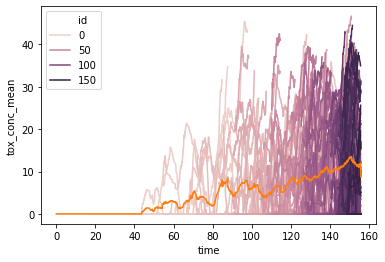

In [119]:
sns.lineplot(x='time', y='tox_conc', hue='id', data=df)
sns.lineplot(x='time', y='tox_conc_mean', data=meandf)

In [120]:
z = 5

In [121]:
pop_df = gro_pop_size(df)
pop_df.to_csv('C:/Users/geeze/Desktop/{}.csv'.format(z))

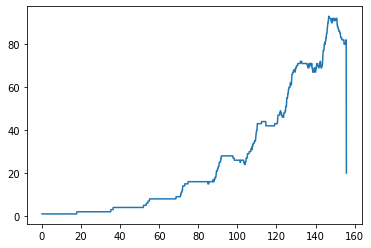

In [122]:
plt.plot(df['time'].unique(), pop_df['pop_size'])

In [123]:
import glob

In [124]:
f = glob.glob('C:/Users/geeze/Desktop/*.csv')

In [125]:
files = []
for x in f:
    if 'output' in x:
        pass
    else:
        files.append(x)

In [126]:
files

['C:/Users/geeze/Desktop\\1.csv',
 'C:/Users/geeze/Desktop\\2.csv',
 'C:/Users/geeze/Desktop\\3.csv',
 'C:/Users/geeze/Desktop\\4.csv',
 'C:/Users/geeze/Desktop\\5.csv']

In [127]:
pop_data = []
for x in files:
    df = pd.read_csv(x)
    
    pop_data.append(df)

Text(0, 0.5, 'Population size')

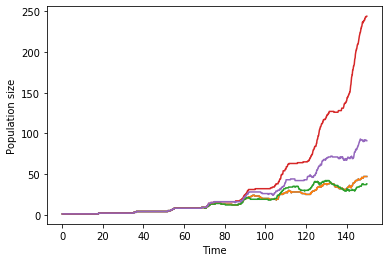

In [130]:
for x in pop_data:
    
    new = x.loc[x['time'] <= 150]
    
    plt.plot(new['time'].unique(), new['pop_size'])
    
plt.xlabel('Time')
plt.ylabel('Population size')